<a href="https://colab.research.google.com/github/siddahant/Cat_vs_dog-CNN/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
import random

In [2]:
url='http://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=url,extract=True)

68608000/68606236 [==============================] - 0s 0us/step


In [3]:
zip_dir_base=os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [4]:
base_dir=os.path.join(zip_dir_base,"cats_and_dogs_filtered")

train_path=os.path.join(base_dir,'train')
validation_path=os.path.join(base_dir,'validation')




In [5]:
train_data=[]
valid_data=[]
categories=['cats','dogs']

for category in categories:
  path_trr=os.path.join(train_path,category)
  path_valid=os.path.join(validation_path,category)

  for trr_img in os.listdir(path_trr):
    trr_lable=categories.index(category)
    img_path_trr=os.path.join(path_trr,trr_img)
    img_trr_arr=cv2.imread(img_path_trr)
    img_trr_arr=cv2.resize(img_trr_arr,(150,150))
    train_data.append([img_trr_arr,trr_lable])

  for val_img in os.listdir(path_valid):
    val_lable=categories.index(category)
    img_path_val=os.path.join(path_valid,val_img)
    img_val_arr=cv2.imread(img_path_val)
    img_val_arr=cv2.resize(img_val_arr,(150,150))
    valid_data.append([img_val_arr,val_lable])

In [6]:
random.shuffle(train_data)
random.shuffle(valid_data)

In [7]:
x_train=[]
y_train=[]
x_valid=[]
y_valid=[]

for images,lable in train_data:
  x_train.append(images)
  y_train.append(lable)

for images1,lable1 in valid_data:
  x_valid.append(images1)
  y_valid.append(lable1)


In [8]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_valid=np.array(x_valid)
y_valid=np.array(y_valid)


In [9]:
x_train=x_train/255

print(x_train.shape)

(2000, 150, 150, 3)


In [10]:
x_valid=x_valid/255

In [11]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3),strides=(2,2),activation='relu', input_shape = (150,150,3)),
                           tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

                           tf.keras.layers.Conv2D(64,(3,3),strides=(2,2),activation='relu'),
                           tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

                           tf.keras.layers.Conv2D(128,(3,3),strides=(2,2),activation='relu'),
                           tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                          

                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512,activation='relu',input_shape=x_train[1:]),
                           tf.keras.layers.Dense(2,activation='softmax')                                    
])


In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_valid,y_valid),steps_per_epoch=20,validation_steps=10)

Epoch 1/100
20/20 [==============================] - 34s 61ms/step - loss: 0.6984 - accuracy: 0.5008 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 1s 37ms/step - loss: 0.6831 - accuracy: 0.5470 - val_loss: 0.6630 - val_accuracy: 0.5290
Epoch 3/100
20/20 [==============================] - 1s 35ms/step - loss: 0.6569 - accuracy: 0.5878 - val_loss: 0.6369 - val_accuracy: 0.5930
Epoch 4/100
20/20 [==============================] - 1s 35ms/step - loss: 0.6009 - accuracy: 0.6524 - val_loss: 0.6263 - val_accuracy: 0.6300
Epoch 5/100
20/20 [==============================] - 1s 36ms/step - loss: 0.5985 - accuracy: 0.6501 - val_loss: 0.5952 - val_accuracy: 0.6630
Epoch 6/100
20/20 [==============================] - 1s 36ms/step - loss: 0.5106 - accuracy: 0.7569 - val_loss: 0.5580 - val_accuracy: 0.7020
Epoch 7/100
20/20 [==============================] - 1s 37ms/step - loss: 0.4413 - accuracy: 0.8020 - val_loss: 0.5682 - val_accuracy: 0.7020
Epoch

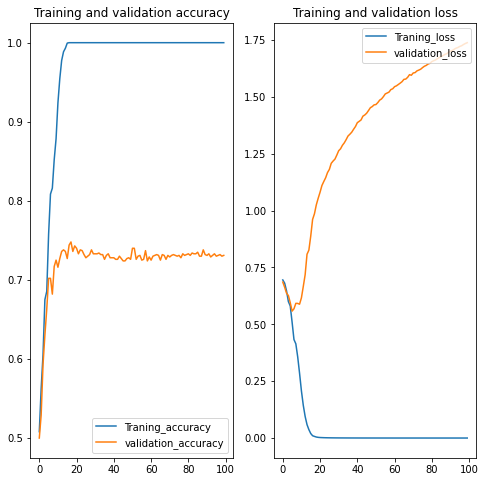

In [15]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(100)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Traning_accuracy')
plt.plot(epochs_range,val_acc,label='validation_accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Traning_loss')
plt.plot(epochs_range,val_loss,label='validation_loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.savefig('./foo.png')
plt.show()

